In [1]:
import numpy as np
from numba import njit, prange, float32, float64, guvectorize
from scipy.ndimage import correlate1d
from scipy import interpolate
from matplotlib import pyplot as plt
#%matplotlib inline

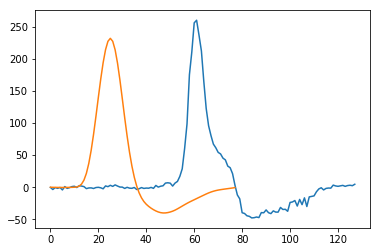

In [8]:
wf0 = np.array([-3.50860596e-01, -3.55261230e+00, -5.70159912e-01, -1.75436401e+00,
       -3.94714355e-01, -4.21051025e+00,  1.00878906e+00, -1.84210205e+00,
       -6.14013672e-01,  1.00878906e+00,  1.49124146e+00, -4.38598633e-01,
        2.32458496e+00,  1.79824829e+00,  9.64935303e-01, -2.19296265e+00,
       -1.14035034e+00, -1.00875854e+00, -1.97366333e+00, -4.82452393e-01,
       -1.31561279e-01, -8.77166748e-01, -2.45611572e+00,  2.01754761e+00,
        8.77197266e-01,  2.98248291e+00,  1.31579590e+00,  3.64035034e+00,
        1.84213257e+00,  2.63183594e-01,  1.75445557e-01, -1.88595581e+00,
       -1.31561279e-01, -1.44735718e+00, -1.71051025e+00, -3.94714355e-01,
       -3.59646606e+00, -2.36840820e+00, -5.70159912e-01, -1.88595581e+00,
       -1.31576538e+00, -1.53506470e+00, -3.07006836e-01, -1.79824829e+00,
        2.76318359e+00,  1.75445557e-01,  1.57894897e+00,  2.23684692e+00,
        6.44738770e+00,  6.92984009e+00,  6.31579590e+00,  1.79824829e+00,
        6.44738770e+00,  8.99124146e+00,  1.68859863e+01,  2.87280884e+01,
        6.04385986e+01,  9.87719421e+01,  1.75350891e+02,  2.10921082e+02,
        2.56271973e+02,  2.60307068e+02,  2.37017578e+02,  2.12500000e+02,
        1.65043884e+02,  1.22763184e+02,  9.58771973e+01,  8.04385986e+01,
        6.71929932e+01,  6.15350952e+01,  5.42982483e+01,  5.18859863e+01,
        4.53070374e+01,  4.26315918e+01,  3.29385986e+01,  3.03947449e+01,
        2.11403503e+01,  3.24563599e+00, -1.20175171e+01, -1.81578979e+01,
       -3.97807007e+01, -4.09210510e+01, -4.45175476e+01, -4.53947144e+01,
       -4.78508606e+01, -4.75000000e+01, -4.64473572e+01, -4.73245544e+01,
       -3.95614014e+01, -3.98684082e+01, -3.53947144e+01, -3.96929626e+01,
       -4.11403503e+01, -3.68859558e+01, -3.87719116e+01, -3.88157654e+01,
       -3.15350647e+01, -3.46929626e+01, -3.43859558e+01, -3.75000000e+01,
       -2.37280579e+01, -2.29824524e+01, -2.07456055e+01, -2.93421021e+01,
       -1.90350647e+01, -2.71491089e+01, -1.65789490e+01, -3.00877075e+01,
       -1.50877075e+01, -1.42982483e+01, -1.35087585e+01, -7.10525513e+00,
       -2.67541504e+00, -8.33312988e-01, -4.21051025e+00, -1.84210205e+00,
       -1.27191162e+00, -1.44735718e+00,  3.28948975e+00,  2.01754761e+00,
        1.40353394e+00,  2.10528564e+00,  2.85089111e+00,  1.35964966e+00,
        2.58773804e+00,  3.07019043e+00,  2.41229248e+00,  4.60528564e+00],
      dtype=np.float32)
reference_pulse = np.array([ 0.00000000e+00, -5.61478318e-04, -9.77862860e-04, -1.25136917e-03,
       -1.40756297e-03, -1.45038498e-03, -1.38165400e-03, -1.18762206e-03,
       -9.94695664e-04, -6.86305861e-04, -1.20753969e-04,  1.61180337e-03,
        6.72624750e-03,  1.89561621e-02,  4.27551432e-02,  8.25952156e-02,
        1.41766444e-01,  2.20574813e-01,  3.16768759e-01,  4.25080005e-01,
        5.38355502e-01,  6.48230558e-01,  7.46022194e-01,  8.23507477e-01,
        8.73760707e-01,  8.91567994e-01,  8.73905141e-01,  8.22810270e-01,
        7.43092501e-01,  6.42333728e-01,  5.29874907e-01,  4.15376179e-01,
        3.06902668e-01,  2.09800214e-01,  1.27009210e-01,  5.94965612e-02,
        6.89133915e-03, -3.33357273e-02, -6.35189593e-02, -8.57509205e-02,
       -1.02141596e-01, -1.14868729e-01, -1.25436484e-01, -1.34504622e-01,
       -1.42125746e-01, -1.48148287e-01, -1.52237910e-01, -1.54172612e-01,
       -1.53938130e-01, -1.51876825e-01, -1.48356914e-01, -1.43493411e-01,
       -1.37207856e-01, -1.29638444e-01, -1.21387874e-01, -1.12967014e-01,
       -1.04621938e-01, -9.65229342e-02, -8.89523629e-02, -8.18735805e-02,
       -7.49667815e-02, -6.79891921e-02, -6.10349617e-02, -5.41816569e-02,
       -4.73145327e-02, -4.05297003e-02, -3.42371025e-02, -2.87702751e-02,
       -2.41030949e-02, -2.02066753e-02, -1.71021464e-02, -1.46356236e-02,
       -1.25062917e-02, -1.04724468e-02, -8.49851528e-03, -6.56749491e-03,
       -4.58392552e-03, -2.36599856e-03])
plt.plot(wf0)
plt.plot(reference_pulse * wf0.max())

In [9]:
wfs = np.tile(wf0, (2048, 1))

In [10]:
@njit([
    float64[:, :](float32[:, :], float64[:]),
], parallel=True, nogil=True)
def cross_correlate_jit(w, ref):
    n_pixels, n_samples = w.shape
    ref_pad = np.zeros(ref.size + n_samples * 2)
    ref_pad[n_samples:n_samples+ref.size] = ref
    cc_res = np.zeros((n_pixels, n_samples))
    for ipix in prange(n_pixels):
        ref_t_start = ref_pad.argmax()
        for t in prange(n_samples):
            start = ref_t_start - t
            end = start + n_samples
            cc_res[ipix, t] = np.sum(w[ipix] * ref_pad[start:end])
    return cc_res

In [11]:
@guvectorize(
    [
        (float32[:], float64[:], float64[:]),
    ],
    '(s),(r)->(s)',
    nopython=True, target='parallel'
)
def cross_correlate_vectorize(w, ref, ret):
    n_samples = w.size
    ref_pad = np.zeros(ref.size + n_samples * 2)
    ref_pad[n_samples:n_samples+ref.size] = ref
    ref_t_start = ref_pad.argmax()
    for t in prange(n_samples):
        start = ref_t_start - t
        end = start + n_samples
        ret[t] = np.sum(w * ref_pad[start:end])

In [16]:
@njit([
    (float32[:], float64[:], float64[:]),
], parallel=True, nogil=True)
def cross_correlate_pixel(w, ref, res):
    n_samples = w.size
    ref_t_start = ref.argmax()
    for t in prange(n_samples):
        start = ref_t_start - t
        end = start + n_samples
        res[t] = np.sum(w * ref[start:end])
        
@njit([
    float64[:, :](float32[:, :], float64[:]),
], parallel=True, nogil=True)
def cross_correlate_camera(w, ref):
    n_pixels, n_samples = w.shape
    ref_pad = np.zeros(ref.size + n_samples * 2)
    ref_pad[n_samples:n_samples+ref.size] = ref
    cc_res = np.zeros((n_pixels, n_samples))
    for ipix in prange(n_pixels):
        cross_correlate_pixel(w[ipix], ref_pad, cc_res[ipix])
    return cc_res

In [25]:
from scipy.ndimage import correlate1d
pad = reference_pulse.size - 2 * np.argmax(reference_pulse)
if pad > 0:
    reference_pulse_scipy = np.pad(reference_pulse, (pad, 0), mode='constant')
else:
    reference_pulse_scipy = np.pad(reference_pulse, (0, -pad), mode='constant')
cc_scipy = correlate1d(wfs, reference_pulse_scipy, mode='constant')

In [26]:
cc_jit = cross_correlate_jit(wfs, reference_pulse)
cc_vectorize = cross_correlate_vectorize(wfs, reference_pulse)
cc_camera = cross_correlate_camera(wfs, reference_pulse)

assert np.allclose(cc_scipy, cc_jit)
assert np.allclose(cc_scipy, cc_vectorize)
assert np.allclose(cc_scipy, cc_camera)

In [24]:
%timeit correlate1d(wfs, reference_pulse_scipy, mode='constant')
%timeit cross_correlate_jit(wfs, reference_pulse)
%timeit cross_correlate_vectorize(wfs, reference_pulse)
%timeit cross_correlate_camera(wfs, reference_pulse)

23.3 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.58 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
42.5 ms ± 529 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
75.6 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
